In [1]:
import geopandas as gpd
import fiona
import matplotlib.pyplot as plt

In [2]:
# Select the policeData geodatabase
Policegdb = r"C:\Users\khasa\OneDrive - The University of Memphis\Fall_2021\Advance_GIS\Homework\Homework_9\PoliceData.gdb\PoliceData.gdb"

# Get all the layers from the geodatabase
layers = fiona.listlayers (Policegdb)
layers

['GraffitiIncidents', 'PatrolZones']

In [3]:
# Select the feature classeses
GraffitiIncidents = gpd.read_file (Policegdb, layer = 'GraffitiIncidents')
PatrolZones = gpd.read_file (Policegdb, layer = 'PatrolZones')

In [4]:
# Examine the GeoDataFrame for each feature class
GraffitiIncidents.head()

,COMMENTS,geometry
0,None,POINT (690453.853 5166304.333)
1,None,POINT (690402.500 5166098.921)
2,Back wall of commercial business,POINT (690373.156 5165959.534)
3,None,POINT (690820.660 5165842.156)
4,None,POINT (690872.013 5166117.261)


In [5]:
PatrolZones.head()

,INCIDENTS,PRIORITY,NAME,POPULATION,SHAPE_Length,SHAPE_Area,geometry
0,0,None,North Central,6477,8777.033636,3.880494e+06,"MULTIPOLYGON (((690464.047 5167124.472, 690468..."
1,0,None,Northeast,5601,7440.428177,3.293690e+06,"MULTIPOLYGON (((691594.121 5164834.759, 690795..."
2,0,None,Downtown,2833,5013.924984,1.432936e+06,"MULTIPOLYGON (((690779.654 5163584.137, 690384..."
3,0,None,Eastside,7790,9206.485855,4.038758e+06,"MULTIPOLYGON (((693865.461 5162964.666, 693072..."
4,0,None,Southeast,4998,10966.221591,6.668385e+06,"MULTIPOLYGON (((691359.668 5162227.932, 691275..."


In [6]:
# Check the co-ordinate system to see the units for area
PatrolZones.crs

<Projected CRS: EPSG:26910>
Name: NAD83 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 126°W and 120°W - onshore and offshore. Canada - British Columbia; Northwest Territories; Yukon. United States (USA) - California; Oregon; Washington.
- bounds: (-126.0, 30.54, -119.99, 81.8)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

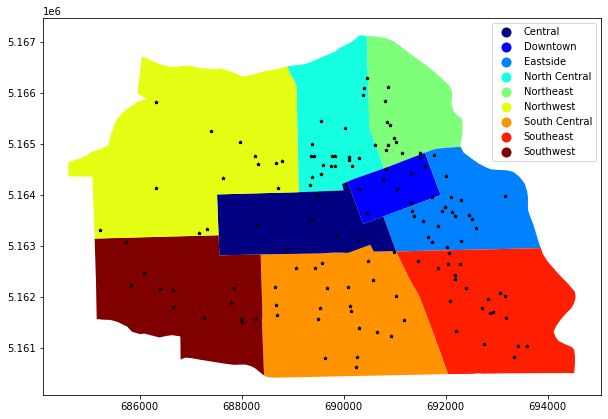

In [7]:
# Display both featureclass together
fig, ax = plt.subplots(1, figsize = (10,10))
PatrolZones.plot (ax = ax, cmap = 'jet', column = 'NAME', legend = True)
GraffitiIncidents.plot (ax = ax, marker = '*', color = 'black', markersize = 10)

In [8]:
# GeoPandas spatatial join to join the layers
joined_df = gpd.sjoin (GraffitiIncidents,PatrolZones, how = "inner", predicate = 'within')
joined_df

,COMMENTS,geometry,index_right,INCIDENTS,PRIORITY,NAME,POPULATION,SHAPE_Length,SHAPE_Area
0,None,POINT (690453.853 5166304.333),0,0,None,North Central,6477,8777.033636,3.880494e+06
1,None,POINT (690402.500 5166098.921),0,0,None,North Central,6477,8777.033636,3.880494e+06
2,Back wall of commercial business,POINT (690373.156 5165959.534),0,0,None,North Central,6477,8777.033636,3.880494e+06
9,None,POINT (690611.580 5164983.828),0,0,None,North Central,6477,8777.033636,3.880494e+06
11,None,POINT (690296.126 5164723.395),0,0,None,North Central,6477,8777.033636,3.880494e+06
...,...,...,...,...,...,...,...,...,...
115,Obscene,POINT (686081.516 5162474.870),7,0,None,Southwest,10224,11495.243750,6.681488e+06
116,None,POINT (685733.050 5163080.101),7,0,None,Southwest,10224,11495.243750,6.681488e+06
118,None,POINT (685835.755 5162247.449),7,0,None,Southwest,10224,11495.243750,6.681488e+06
121,None,POINT (687999.916 5161510.168),7,0,None,Southwest,10224,11495.243750,6.681488e+06


In [9]:
# Groupby to count the Graffiti incidents in each Patrol Zones. Here, we count the rows for geometry.
count_zone = joined_df.groupby (['NAME'], as_index = False)['geometry'].count()
count_zone

,NAME,geometry
0,Central,6
1,Downtown,10
2,Eastside,20
3,North Central,21
4,Northeast,10
5,Northwest,13
6,South Central,23
7,Southeast,21
8,Southwest,12


In [10]:
# Rename the column of geometry
count_zone.columns = ['NAME', 'Count_zone']
count_zone

,NAME,Count_zone
0,Central,6
1,Downtown,10
2,Eastside,20
3,North Central,21
4,Northeast,10
5,Northwest,13
6,South Central,23
7,Southeast,21
8,Southwest,12


In [11]:
# Merge the count_zone dataframe to the New PatrolZones feature class
PatrolZones_New = PatrolZones.merge(count_zone, on = "NAME", how = "left")

In [12]:
PatrolZones_New

,INCIDENTS,PRIORITY,NAME,POPULATION,SHAPE_Length,SHAPE_Area,geometry,Count_zone
0,0,None,North Central,6477,8777.033636,3.880494e+06,"MULTIPOLYGON (((690464.047 5167124.472, 690468...",21
1,0,None,Northeast,5601,7440.428177,3.293690e+06,"MULTIPOLYGON (((691594.121 5164834.759, 690795...",10
2,0,None,Downtown,2833,5013.924984,1.432936e+06,"MULTIPOLYGON (((690779.654 5163584.137, 690384...",10
3,0,None,Eastside,7790,9206.485855,4.038758e+06,"MULTIPOLYGON (((693865.461 5162964.666, 693072...",20
4,0,None,Southeast,4998,10966.221591,6.668385e+06,"MULTIPOLYGON (((691359.668 5162227.932, 691275...",21
5,0,None,South Central,9527,11373.304385,7.716063e+06,"MULTIPOLYGON (((691030.488 5162897.270, 691039...",23
6,0,None,Central,7902,9539.703811,3.663411e+06,"MULTIPOLYGON (((690779.654 5163584.137, 691030...",6
7,0,None,Southwest,10224,11495.243750,6.681488e+06,"MULTIPOLYGON (((688374.476 5162840.310, 688410...",12
8,0,None,Northwest,12118,15289.916918,1.102094e+07,"MULTIPOLYGON (((688889.416 5166528.990, 688977...",13


In [13]:
# Update the INCIDENTS column with the Count_zone column
PatrolZones_New['INCIDENTS'] = PatrolZones_New['Count_zone']

In [14]:
# Create the criteria for priority ranking using the area in square mile.
PatrolZones_New ['Area(sq.mi)'] = PatrolZones_New.area/2590000
PatrolZones_New ['Criteria'] = (PatrolZones_New ['INCIDENTS']/PatrolZones_New ['Area(sq.mi)']).astype(int)

In [15]:
PatrolZones_New

,INCIDENTS,PRIORITY,NAME,POPULATION,SHAPE_Length,SHAPE_Area,geometry,Count_zone,Area(sq.mi),Criteria
0,21,None,North Central,6477,8777.033636,3.880494e+06,"MULTIPOLYGON (((690464.047 5167124.472, 690468...",21,1.498260,14
1,10,None,Northeast,5601,7440.428177,3.293690e+06,"MULTIPOLYGON (((691594.121 5164834.759, 690795...",10,1.271695,7
2,10,None,Downtown,2833,5013.924984,1.432936e+06,"MULTIPOLYGON (((690779.654 5163584.137, 690384...",10,0.553257,18
3,20,None,Eastside,7790,9206.485855,4.038758e+06,"MULTIPOLYGON (((693865.461 5162964.666, 693072...",20,1.559366,12
4,21,None,Southeast,4998,10966.221591,6.668385e+06,"MULTIPOLYGON (((691359.668 5162227.932, 691275...",21,2.574666,8
5,23,None,South Central,9527,11373.304385,7.716063e+06,"MULTIPOLYGON (((691030.488 5162897.270, 691039...",23,2.979175,7
6,6,None,Central,7902,9539.703811,3.663411e+06,"MULTIPOLYGON (((690779.654 5163584.137, 691030...",6,1.414444,4
7,12,None,Southwest,10224,11495.243750,6.681488e+06,"MULTIPOLYGON (((688374.476 5162840.310, 688410...",12,2.579725,4
8,13,None,Northwest,12118,15289.916918,1.102094e+07,"MULTIPOLYGON (((688889.416 5166528.990, 688977...",13,4.255189,3


In [16]:
# Conditions and values for the priority ranking
conditions = [
    (PatrolZones_New['Criteria']<6),
    (PatrolZones_New['Criteria']<12) & (PatrolZones_New['Criteria']>=6),
    (PatrolZones_New['Criteria']<15) & (PatrolZones_New['Criteria']>=12),
    (PatrolZones_New['Criteria']>=15)
]
values = ["LOW CONCERN", "SOME CONCERN", "HIGH CONCERN", "TOP CONCERN"]

In [17]:
# Assign the appropriate priority ranking using numpy
import numpy as np
PatrolZones_New['PRIORITY'] = np.select (conditions,values)

In [18]:
# Delete the extra columns and see the final output as PatrolZones_New
PatrolZones_New.drop (columns = ['Count_zone','Area(sq.mi)','Criteria' ], inplace = True)
PatrolZones_New

,INCIDENTS,PRIORITY,NAME,POPULATION,SHAPE_Length,SHAPE_Area,geometry
0,21,HIGH CONCERN,North Central,6477,8777.033636,3.880494e+06,"MULTIPOLYGON (((690464.047 5167124.472, 690468..."
1,10,SOME CONCERN,Northeast,5601,7440.428177,3.293690e+06,"MULTIPOLYGON (((691594.121 5164834.759, 690795..."
2,10,TOP CONCERN,Downtown,2833,5013.924984,1.432936e+06,"MULTIPOLYGON (((690779.654 5163584.137, 690384..."
3,20,HIGH CONCERN,Eastside,7790,9206.485855,4.038758e+06,"MULTIPOLYGON (((693865.461 5162964.666, 693072..."
4,21,SOME CONCERN,Southeast,4998,10966.221591,6.668385e+06,"MULTIPOLYGON (((691359.668 5162227.932, 691275..."
5,23,SOME CONCERN,South Central,9527,11373.304385,7.716063e+06,"MULTIPOLYGON (((691030.488 5162897.270, 691039..."
6,6,LOW CONCERN,Central,7902,9539.703811,3.663411e+06,"MULTIPOLYGON (((690779.654 5163584.137, 691030..."
7,12,LOW CONCERN,Southwest,10224,11495.243750,6.681488e+06,"MULTIPOLYGON (((688374.476 5162840.310, 688410..."
8,13,LOW CONCERN,Northwest,12118,15289.916918,1.102094e+07,"MULTIPOLYGON (((688889.416 5166528.990, 688977..."
